In [3]:
! pip install pandas
! pip install pyodbc
! pip install sqlalchemy

import pandas as pd
import mysql.connector
import urllib
from sqlalchemy import create_engine

db = mysql.connector.connect(user='bi', password='bp42!BBB', host='127.0.0.1', database='betterplace', port=3307)

In [258]:
sql = '''
SELECT activated_at_year_local Jahr, count(*) as Anzahl_Projekte
FROM bi_project_values
where status = "activated"
group by activated_at_year_local;
'''

data = pd.read_sql_query(sql, db)

In [259]:
data

,Jahr,Anzahl_Projekte
0,2007,10
1,2008,54
2,2009,127
3,2010,165
4,2011,222
5,2012,341
6,2013,576
7,2014,676
8,2015,1058
9,2016,1417


In [260]:
type(data)

pandas.core.frame.DataFrame

In [261]:
print(len(data))

14


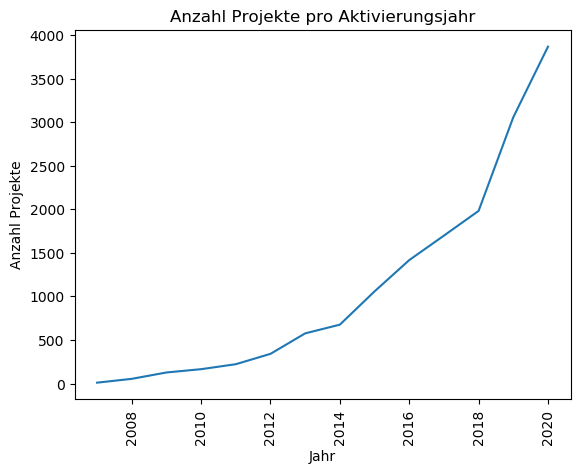

In [262]:
import matplotlib.pyplot as plt
plt.plot(data['Jahr'], data['Anzahl_Projekte'])
plt.xticks(rotation = 90)
plt.title("Anzahl Projekte pro Aktivierungsjahr")
plt.xlabel("Jahr")
plt.ylabel("Anzahl Projekte")
plt.show()

In [263]:
type(data['Jahr'])

pandas.core.series.Series

In [264]:
sql = '''
SELECT status, count(*) as Anzahl_Projekte
FROM bi_project_values
group by status;
'''

data1 = pd.read_sql_query(sql, db)

In [265]:
data1

,status,Anzahl_Projekte
0,activated,15250
1,blocked,1371
2,closed,21580
3,preparing,641
4,proposed,114


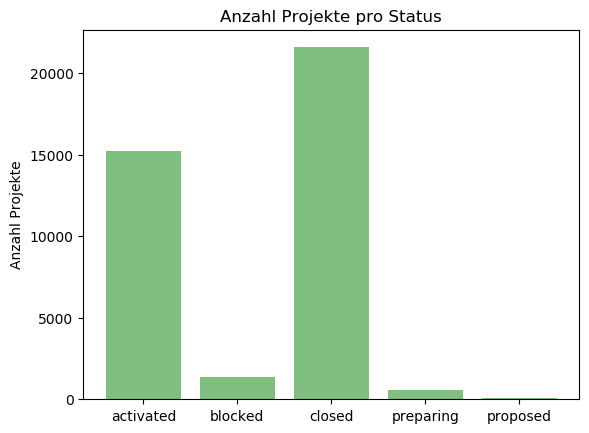

In [224]:
#vertikales Barchart der oberen Tabelle:

import matplotlib.pyplot as plt; plt.rcdefaults()
import numpy as np
import matplotlib.pyplot as plt

objects = (data1['status'])
y_pos = np.arange(len(objects))
performance = (data1['Anzahl_Projekte'])

plt.bar(y_pos, performance, align='center', alpha=0.5, color = 'green')
plt.xticks(y_pos, objects)
plt.ylabel('Anzahl Projekte')
plt.title('Anzahl Projekte pro Status')

plt.show()
#alpha=x definiert die Farbsättigung, 0.1 ist sehr durchsichtig, 1 ist deckend

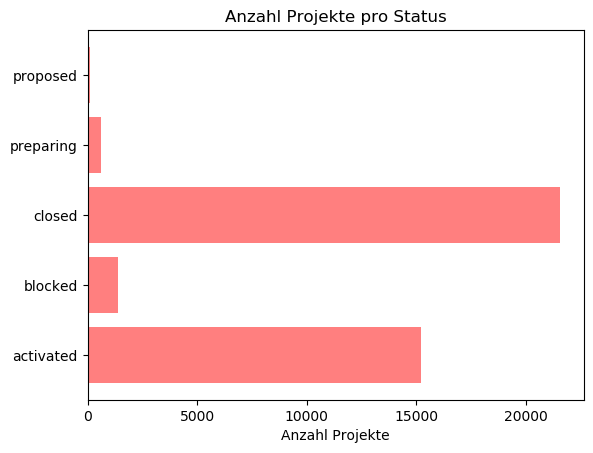

In [225]:
#horizontales Barchart der oberen Tabelle

import matplotlib.pyplot as plt; plt.rcdefaults()
import numpy as np
import matplotlib.pyplot as plt

objects = (data1['status'])
y_pos = np.arange(len(objects))
performance = (data1['Anzahl_Projekte'])

plt.barh(y_pos, performance, align='center', alpha=0.5, color = 'red')
plt.yticks(y_pos, objects)
plt.xlabel('Anzahl Projekte')
plt.title('Anzahl Projekte pro Status')

plt.show()

In the next section I try to rebuild the number of projects by year without using sql group function but solely python. 

First I´ll get the flat ungrouped list out of sql.
The output is a panda dataframe. 

So I need to convert this into a list (a list of lists actually) to be able to use dictionaries and for loops.

Finally I use the for loop to group the number of projects per year in the new dictionary "grouping".

In [7]:
sql = '''
SELECT activated_at_year_local as "year", project_id
FROM bi_project_values
where status = "activated";
'''

data2 = pd.read_sql_query(sql, db)

In [8]:
data2

,year,project_id
0,2007,35
1,2007,64
2,2007,67
3,2007,71
4,2007,73
...,...,...
15245,2020,86511
15246,2020,86520
15247,2020,86518
15248,2020,86522


In [228]:
type(data2)

pandas.core.frame.DataFrame

In [11]:
##to convert a panda dataframe to a list:
data_list = data2.values.tolist()

In [12]:
type(data_list)

list

In [13]:
data_list[0:5]

[[2007, 35], [2007, 64], [2007, 67], [2007, 71], [2007, 73]]

In [14]:
grouping = {}
for element in data_list:
    year = element[0]
    if year in grouping:
        grouping[year] += 1
    else: grouping[year] = 1
        
print(grouping)

{2007: 10, 2008: 54, 2010: 165, 2009: 127, 2011: 222, 2012: 341, 2013: 576, 2014: 676, 2015: 1058, 2016: 1417, 2017: 1698, 2018: 1982, 2019: 3057, 2020: 3867}


In [233]:
type(grouping)

dict

In [173]:
## I think I need to convert the dictionary into a list to use matplotlib to create a diagram ...
## to convert a dictionary into a list:
new_list = grouping.values()
print(new_list)

dict_values([10, 54, 165, 127, 222, 341, 577, 678, 1059, 1417, 1698, 1986, 3063, 3779])


seems that matplotlib does not need a list to create a bar chart. Seems I need to configure the matplotlib.pyplot to make it work. How can I access the dictionary for the axes?

In [206]:
print(grouping.keys())
print(grouping.values())

dict_keys([2007, 2008, 2010, 2009, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020])
dict_values([10, 54, 165, 127, 222, 341, 577, 678, 1059, 1417, 1698, 1986, 3063, 3779])


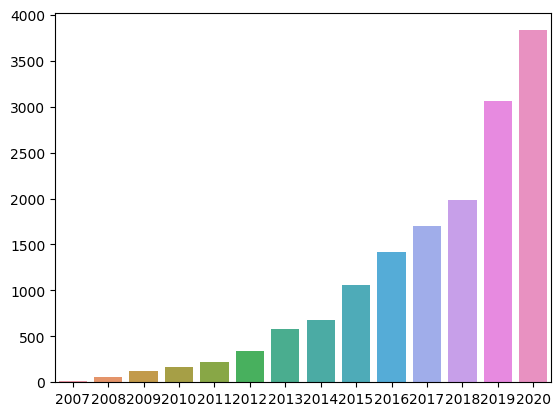

In [234]:
import seaborn as sns

sns.barplot(list(grouping.keys()), list(grouping.values()))


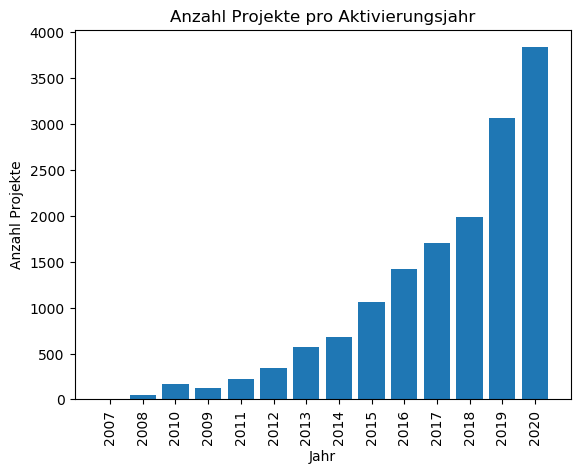

In [236]:
import matplotlib.pyplot as plt

plt.bar(range(len(grouping.keys())), list(grouping.values()), align='center')
plt.xticks(range(len(grouping)), list(grouping.keys()), rotation = 90)
plt.title("Anzahl Projekte pro Aktivierungsjahr")
plt.xlabel("Jahr")
plt.ylabel("Anzahl Projekte")
plt.show()

## the order of the x-axis is wrong:

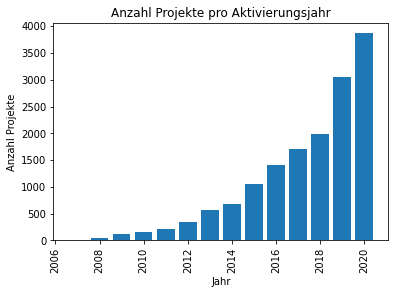

In [17]:
#the code from Pablo removes the range and len parts

import matplotlib.pyplot as plt
plt.bar(grouping.keys(), grouping.values(), align='center')
plt.xticks(rotation = 90)
plt.title("Anzahl Projekte pro Aktivierungsjahr")
plt.xlabel("Jahr")
plt.ylabel("Anzahl Projekte")
plt.show()

#somehow only every second bar is labeled, need to check

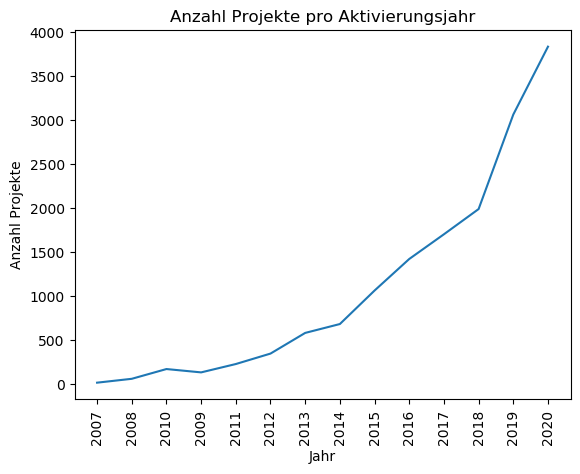

In [244]:
import matplotlib.pyplot as plt
plt.plot(range(len(grouping.keys())), list(grouping.values()))
plt.xticks(range(len(grouping)), list(grouping.keys()), rotation = 90)
plt.title("Anzahl Projekte pro Aktivierungsjahr")
plt.xlabel("Jahr")
plt.ylabel("Anzahl Projekte")
plt.show()

## the order of the x axis is wrong


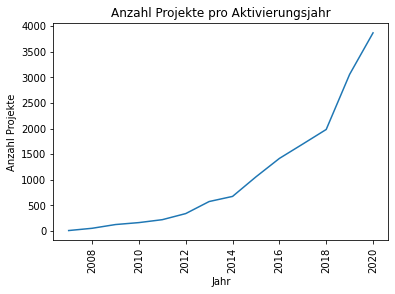

In [15]:
##this code below is from Pablos doc:

import matplotlib.pyplot as plt
sorted_grouping = {k: grouping[k] for k in sorted(grouping)}
plt.plot(sorted_grouping.keys(), sorted_grouping.values())
plt.xticks(rotation = 90)
plt.title("Anzahl Projekte pro Aktivierungsjahr")
plt.xlabel("Jahr")
plt.ylabel("Anzahl Projekte")
plt.show()
## doesn´t work

I am now checking if I can add the ordered_dict code parts from Pablos doc to the original code (that works in terms of presenting a plot chart but gives the x axis in the wrong order):

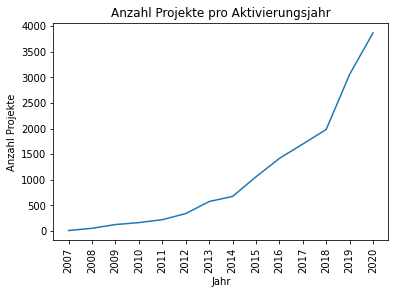

In [16]:
import matplotlib.pyplot as plt

sorted_grouping = {k: grouping[k] for k in sorted(grouping)}

plt.plot(range(len(sorted_grouping.keys())), list(sorted_grouping.values()))
plt.xticks(range(len(sorted_grouping)), list(sorted_grouping.keys()), rotation = 90)
plt.title("Anzahl Projekte pro Aktivierungsjahr")
plt.xlabel("Jahr")
plt.ylabel("Anzahl Projekte")
plt.show()

In [1]:
##how to get the version of the installed library
import matplotlib
print('matplotlib: {}'.format(matplotlib.__version__))

matplotlib: 3.3.2
